In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/nas.dbms/fathan/test/multilang-hate-models/data_preprocessed.csv', header = 0)
df.dropna(subset=['text'], inplace=True)
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 11068 entries, 0 to 11102
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hs_class  11068 non-null  object
 1   text      11068 non-null  object
dtypes: object(2)
memory usage: 259.4+ KB


,hs_class,text
4164,positive,jokowi mega calon presiden mundur bikin ai
4561,positive,ayat ringkas bahasa makhluk asing eak ssalam w...
5334,positive,keren nih program terima kasih jokowi jokowi i...
5268,positive,salah jokowi uniform resource locator
9651,negative,aduh mata gue sipit banget im not a cina mysel...


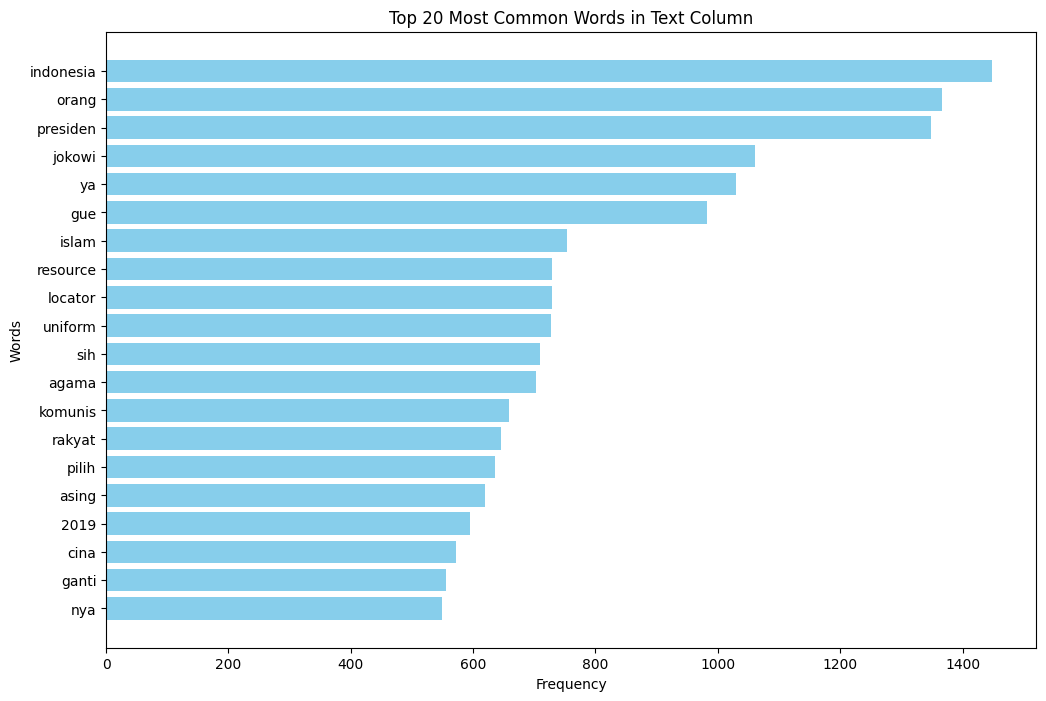

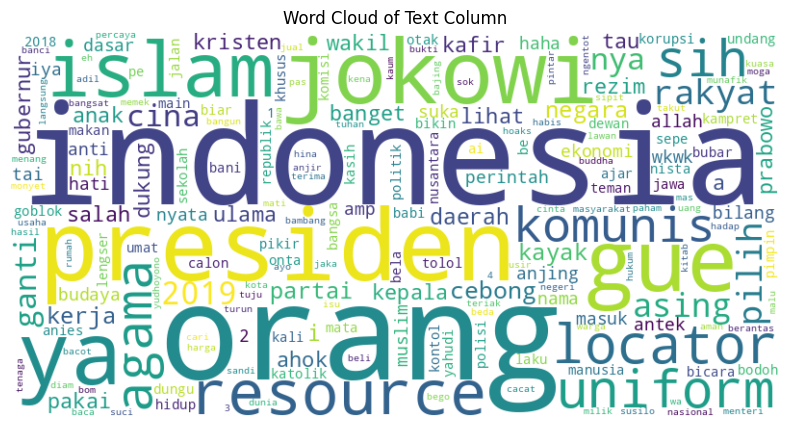

In [7]:
from collections import Counter
from wordcloud import WordCloud

# Combine all text into one large string
all_text = ' '.join(df['text'])

# Split into words and count occurrences
word_counts = Counter(all_text.split())

# Get the most common words
most_common_words = word_counts.most_common(20)

# Separate words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Plot the most common words
plt.figure(figsize=(12, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Text Column')
plt.gca().invert_yaxis()
plt.show()

# Optional: Display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Column')
plt.show()

In [ ]:
from wordcloud import WordCloud , STOPWORDS
cloud1 = WordCloud(stopwords =STOPWORDS, background_color='white',min_word_length=2,random_state= 53).generate(str(df[df.hs_class=='negative']['text'].values))
cloud2 = WordCloud(stopwords =STOPWORDS, background_color='white',min_word_length=2,random_state= 53).generate(str(df[df.hs_class=='positive']['text'].values))

In [ ]:
cloud1.words_
for key in cloud1.words_.keys():
    if cloud2.words_.get(key,False):
        if cloud2.words_.get(key,None)> 0.4 and cloud1.words_.get(key,None) > 0.4:
            print(f'{key:10} {round(cloud1.words_[key],2):10}{round(cloud2.words_[key],2):10}')

ya                1.0       1.0
lihat             0.5       0.5


Text(0.5, 1.0, 'positive')

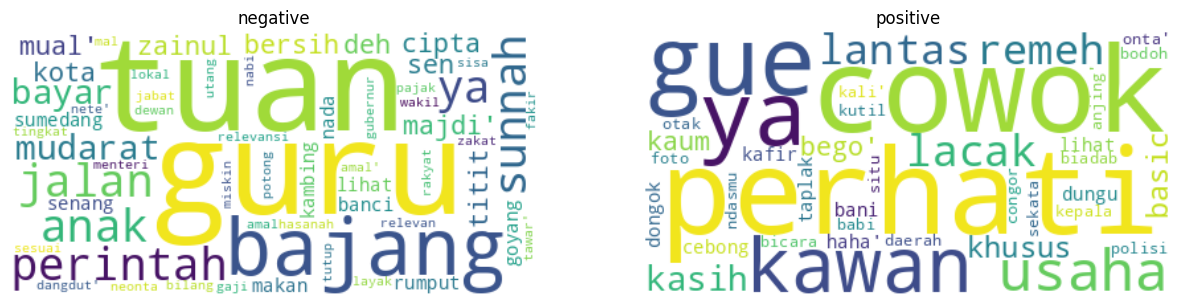

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.imshow(cloud1, interpolation = 'bilinear')
ax1.axis('off')
ax1.set_title("negative")

ax2.imshow(cloud2, interpolation = 'bilinear')
ax2.axis('off')
ax2.set_title("positive")

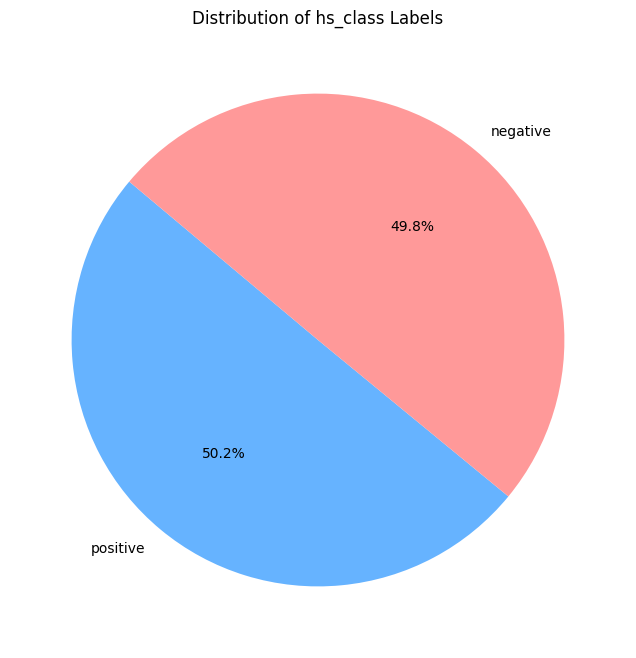

In [ ]:
# Generate pie chart for 'hs_class' labels
class_counts = df['hs_class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of hs_class Labels')
plt.show()